In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('social_media_ads.csv')
data

,Ad Spending,Sales
0,3994.575387,8236.376846
1,2562.921756,4965.351272
2,2926.829035,6048.545498
3,2513.336700,6114.373799
4,1056.690640,2598.943632
...,...,...
495,4224.961006,8630.258895
496,784.884645,1344.616714
497,3996.809828,7707.807972
498,1087.973868,2213.170701


   Ad Spending        Sales
0  3994.575387  8236.376846
1  2562.921756  4965.351272
2  2926.829035  6048.545498
3  2513.336700  6114.373799
4  1056.690640  2598.943632


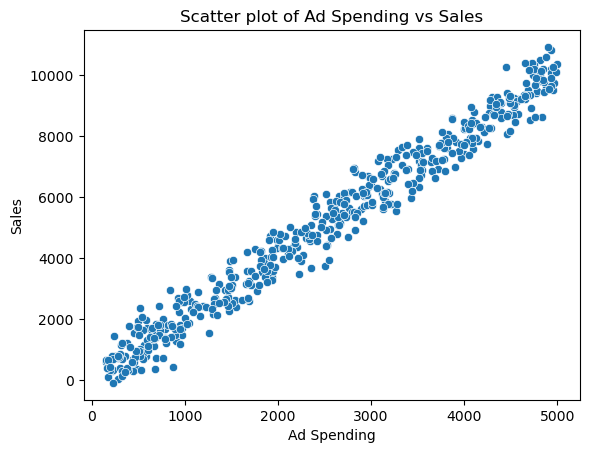

Correlation between Ad Spending and Sales: 0.9860963410606132
Mean Absolute Error (MAE): 383.2358536324991
Mean Squared Error (MSE): 228602.6424769718
R-squared: 0.975389947449079
Predicted Sales for $1500 Ad Spending: 3092.8847967416045


C:\Users\Vikram\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


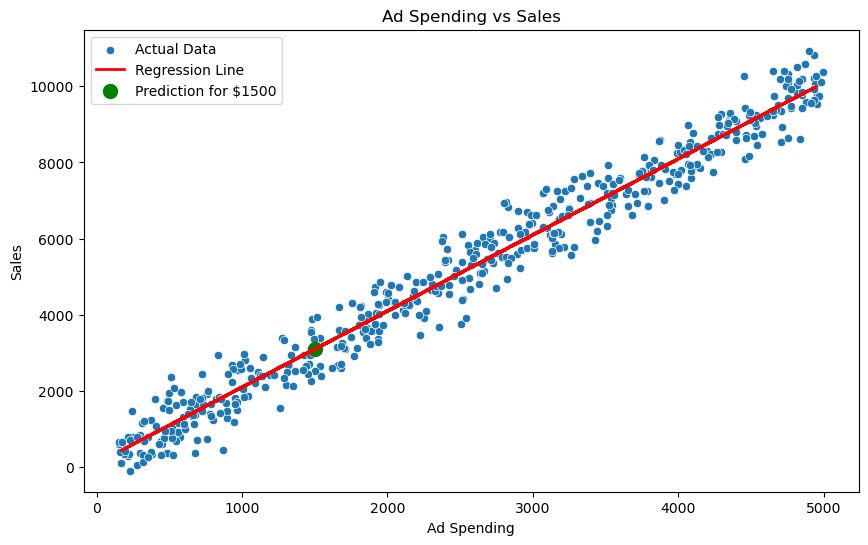

In [15]:



data = data.dropna()
data = data[(data['Ad Spending'] < (data['Ad Spending'].mean() + 3 * data['Ad Spending'].std()))]

print(data.head())

sns.scatterplot(x='Ad Spending', y='Sales', data=data)
plt.title('Scatter plot of Ad Spending vs Sales')
plt.xlabel('Ad Spending')
plt.ylabel('Sales')
plt.show()

correlation = data['Ad Spending'].corr(data['Sales'])
print(f'Correlation between Ad Spending and Sales: {correlation}')

X = data[['Ad Spending']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')

predicting_value=1500
new_ad_spending = [[predicting_value]]  
predicted_sales = model.predict(new_ad_spending)
print(f'Predicted Sales for ${predicting_value} Ad Spending: {predicted_sales[0]}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ad Spending', y='Sales', data=data, label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

plt.scatter(new_ad_spending, predicted_sales, color='green', s=100, label=f'Prediction for ${predicting_value}')

plt.title('Ad Spending vs Sales')
plt.xlabel('Ad Spending')
plt.ylabel('Sales')
plt.legend()
plt.show()